In [ ]:
#오차(Error)

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Image

import warnings

warnings.filterwarnings('ignore')

In [ ]:
#유방암 환자 데이터 셋을 로드
#target
"""
0: 악성종양
1: 양성종양
"""

In [2]:
cancer = load_breast_cancer()

In [4]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
data = cancer['data']
target = cancer['target']
feature_names = cancer['feature_names']

In [9]:
df = pd.DataFrame(data = data , columns = feature_names)
df['target'] = cancer['target']

In [10]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
pos = df.loc[df['target']==1]
neg = df.loc[df['target']==0]

In [14]:
#양성환자 357 + 악성환자 5

In [15]:
sample = pd.concat([pos, neg[:5]], sort = True)

In [16]:
sample

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,...,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture
19,23.560,0.014600,0.013150,0.02387,0.002300,566.3,0.08129,0.047810,0.06664,0.05766,...,711.2,0.17730,0.12880,0.23900,0.07259,99.70,15.110,0.14400,0.2977,19.26
20,14.670,0.018980,0.006490,0.01698,0.002425,520.0,0.12700,0.031100,0.04568,0.06811,...,630.5,0.27760,0.07283,0.18900,0.08183,96.09,14.500,0.13120,0.3184,20.49
21,15.700,0.014320,0.014210,0.01985,0.002968,273.9,0.06492,0.020760,0.02956,0.06905,...,314.9,0.11480,0.06227,0.08867,0.07773,65.13,10.230,0.13240,0.2450,15.66
37,14.160,0.004899,0.011640,0.01343,0.001777,523.8,0.03766,0.029230,0.02562,0.05863,...,545.9,0.04619,0.05013,0.04833,0.06169,84.46,13.300,0.09701,0.1987,22.81
46,8.205,0.016460,0.005917,0.01588,0.002582,201.9,0.05943,0.005917,0.01588,0.06503,...,242.2,0.13570,0.02564,0.06880,0.07409,57.26,8.964,0.12970,0.3105,21.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,153.400,0.049040,0.015870,0.05373,0.006193,1001.0,0.27760,0.147100,0.30010,0.07871,...,2019.0,0.66560,0.26540,0.71190,0.11890,184.60,25.380,0.16220,0.4601,17.33
1,74.080,0.013080,0.013400,0.01860,0.003532,1326.0,0.07864,0.070170,0.08690,0.05667,...,1956.0,0.18660,0.18600,0.24160,0.08902,158.80,24.990,0.12380,0.2750,23.41
2,94.030,0.040060,0.020580,0.03832,0.004571,1203.0,0.15990,0.127900,0.19740,0.05999,...,1709.0,0.42450,0.24300,0.45040,0.08758,152.50,23.570,0.14440,0.3613,25.53
3,27.230,0.074580,0.018670,0.05661,0.009208,386.1,0.28390,0.105200,0.24140,0.09744,...,567.7,0.86630,0.25750,0.68690,0.17300,98.87,14.910,0.20980,0.6638,26.50


In [19]:
x_train, x_valid, y_train, y_valid =  train_test_split(sample.drop('target',1), sample['target'], random_state = 42)

In [20]:
x_train.shape, y_train.shape

((271, 30), (271,))

In [21]:
x_valid.shape, y_valid.shape

((91, 30), (91,))

In [28]:
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_valid)

In [29]:
(pred == y_valid).mean()

0.978021978021978

In [31]:
##가상 상황

my_pred  = np.ones(shape = y_valid.shape)

In [32]:
(my_pred == y_valid).mean()

0.989010989010989

In [ ]:
"""
정확도만 놓고 본다면, 제가 만든 무조건 음성 환자로 예측하는 분류기가 성능이 좋다
하지만, 의사가 과연 무조건 음성 환자로 예측해서 예측율 98.9%로 말하는 의사는 자질이 좋은 의시일까요?

정확도만 보고 분류기의 성능을 판별하는 것은 위와 같은 오류에 빠질 수 있습니다.
이를 보완하고 생격난 재표들이 있습니다. 
"""

In [33]:
#오차행렬

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_valid, pred)

array([[ 1,  0],
       [ 2, 88]], dtype=int64)

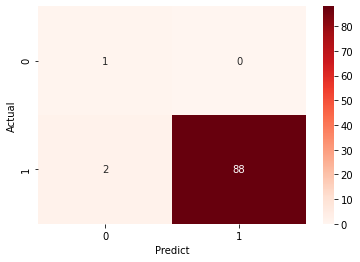

In [41]:
sns.heatmap(confusion_matrix(y_valid, pred), annot = True, cmap = 'Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

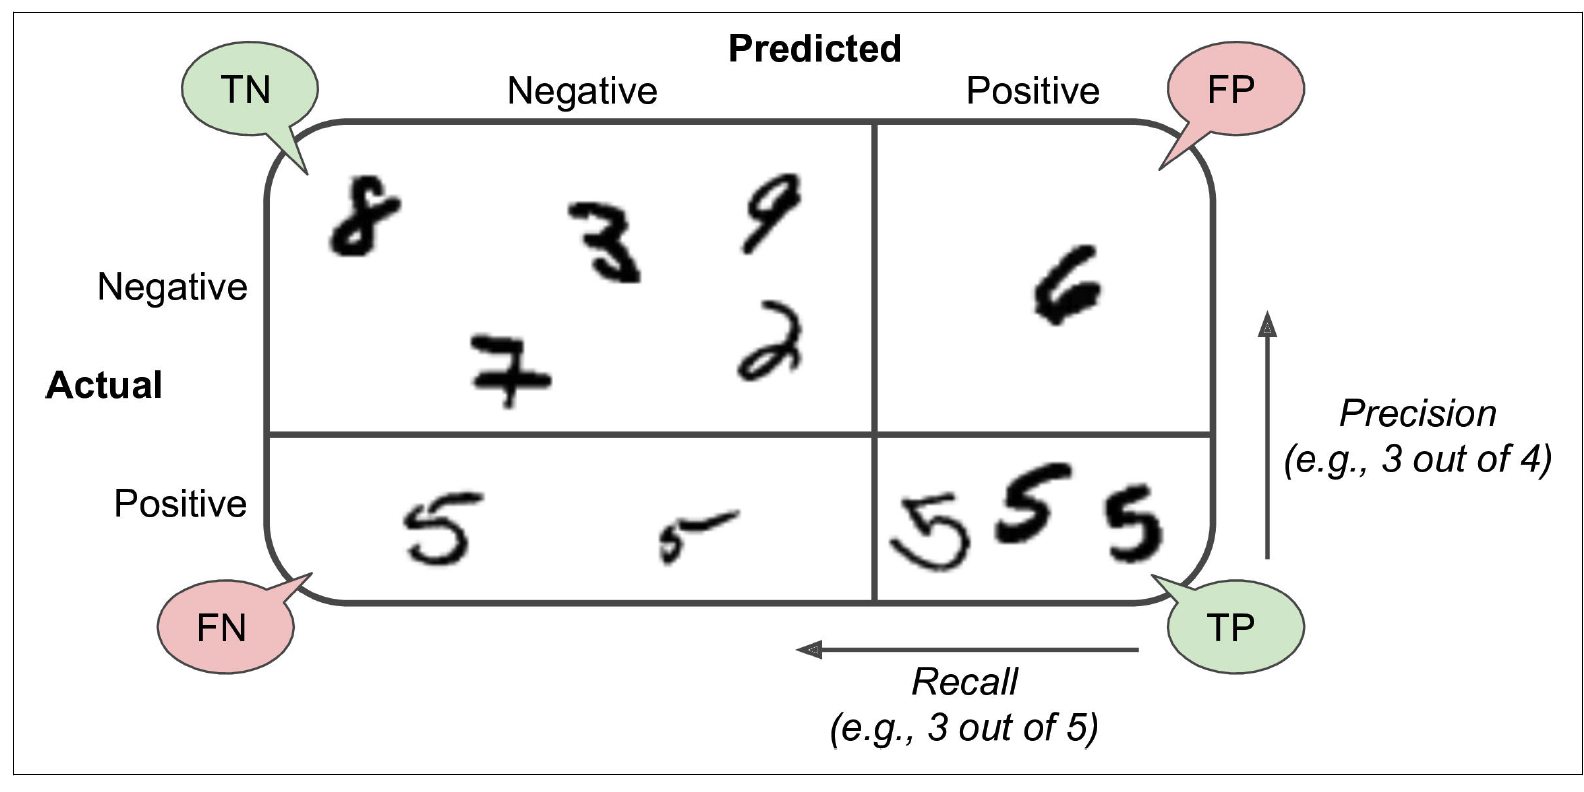

In [45]:
# 출처: https://dojinkimm.github.io
Image('https://dojinkimm.github.io/assets/imgs/ml/handson_3_1.png')

In [ ]:
#정밀도 
"""
양성 예측 정확도
TP / (TP+FP)
"""

In [46]:
from sklearn.metrics import precision_score, recall_score

In [48]:
precision_score(y_valid, pred)
"""
88 / (88+0) = 1
"""

1.0

In [ ]:
#재현율(recall)
"""
정확하게 감지한 양성 샘플의 비율
민감도 혹은 True Positive Rate(TPR) 이라고도 불림
TP / (TP + FN)
"""

In [50]:
round(recall_score(y_valid, pred),2)

0.98

In [ ]:
#f1 score
"""
정밀도와 재현율의 조화 평균을 나타내는 지표"""

In [54]:
from sklearn.metrics import f1_score

In [56]:
f1_score(y_valid, pred)

0.9887640449438202